# Assessing the Relationship between Train Strike Trespasser Fatalities

in California and Population Density

DSAN 6750 / PPOL 6805: GIS for Spatial Data Science

Lindsay Strong (Georgetown University)

## Introduction

From 2012-2017, there were 3,687 railroad trespasser fatalities across the United States ([Kidda et al. 2020](#ref-kidda2020fatal)). Previous studies have assessed the trends among trespesser strikes and emphasized that trespasser strikes are an urban problem opposed to a rural problem. I will assess the relationship between population density and trespasser strikes using spatial data science techniques.

As California has the most trespasser fatalities out of any US state, I will be limiting my analysis to California ([Kidda et al. 2020](#ref-kidda2020fatal)). I will use trespasser strike data from the Department of Transportation which includes point data for the latitude and longitude of the strike.

By assessing the relationship between trespasser fatalities in California and population density, I hope to apply my findings to targeted interventions to prevent future trespasser strikes.

## Literature Review

The Federal Rail Association (FRA) assessed trends in trespasser train strikes from 2012-2017. California, New York, Florida and Texas had the most trespasser strikes across U.S. states ([Kidda et al. 2020](#ref-kidda2020fatal)). The FRA identified trends among suicides, train types, time of day, age, and individual’s action at the time of death ([Kidda et al. 2020](#ref-kidda2020fatal)). This paper does not assess the relationship between population density and trespasser strikes.

Northwestern economics professor, Ian Savage, notes in his manuscript on *Trespassing the Railroad* in 2007 that trespasser strikes appear to be an urban problem opposed to a city one as “less than one quarter of fatalities occur outside of town or city limits” ([Savage 2007](#ref-savage2007trespassing)).

## Methodology

For **population density**, I used California census tract data from 2020 using tidycensus and divided the total population by the total area for each tract. For the hypothesis testing, I computed the centroid of these census tracts for my underlying density.

## Exploratory Data Analysis (EDA)

The map below shows the 1,528 trespasser fatalities (in purple) California from 2011-2022.

In [ ]:
# import libraries and csv
cb_palette <- c(
  "#E69F00", "#56B4E9", "#009E73", "#F0E442","#0072B2", "#D55E00", "#CC79A7"
)
library(sf)

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

Rows: 7257 Columns: 21

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): the_geom, RAILROAD, INCDTNO, AGE, CAS57, AMPM, cnty10, rr, STATUS,...
dbl  (5): YEAR4, TIMEHR, TIMEMIN, LATITUDE, LONGITUD
num  (1): OBJECTID
lgl  (1): COVERDATA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

By looking at only census tracts where fatalities have occured, we can see hotspots for strikes in Northern California, specifically around the Richmond and Berkeley area as well as around the Davis area and Modesto area. There appear to be fewer strikes in southern California but there appears to be a cluster around the Pomona and Ontario area.

In [ ]:
library(tigris)

To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Your original .Renviron will be backed up and stored in your R HOME directory if needed.
Your API key has been stored in your .Renviron and can be accessed by Sys.getenv("CENSUS_API_KEY"). 
To use now, restart R or run `readRenviron("~/.Renviron")`

[1] "22de4cafe1259cf144997981fc5e359e41276773"

Getting data from the 2016-2020 5-year ACS

### Global Moran’s I

Using Moran’s I for spatial autocorrelation, we can determine if the data is clustered and we can use Local Moran’s I to identify where these clusters lie. I used all of the census tracts across California, even those without strikes, in order to access clustering.

The result from Moran’s I test is displayed below.

In [ ]:
library(spdep)

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Warning in spdep::poly2nb(california_tracts): some observations have no neighbours;
if this seems unexpected, try increasing the snap argument.

Warning in spdep::poly2nb(california_tracts): neighbour object has 5 sub-graphs;
if this sub-graph count seems unexpected, try increasing the snap argument.

[1] 0.15995

A value of roughly 0.16 indicates a slight positive autocorrelation so we can conclude that nearby census tracts have slightly similar numbers of strikes.

### Local Moran’s I

Local Moran’s I test identifies areas where strikes are clustered together. The results of Local Moran’s I test can be shown in the map below.

In [ ]:
spatial_weights <- poly2nb(as(california_tracts$geometry, "Spatial"), queen=TRUE, )

Warning in poly2nb(as(california_tracts$geometry, "Spatial"), queen = TRUE, : some observations have no neighbours;
if this seems unexpected, try increasing the snap argument.

Warning in poly2nb(as(california_tracts$geometry, "Spatial"), queen = TRUE, : neighbour object has 5 sub-graphs;
if this sub-graph count seems unexpected, try increasing the snap argument.

## Hypothesis Testing

I will conduct hypothesis testing using 999 monte carlo simulations. My hypotheses are as follows:

**Null Hypothesis**: The number of trespasser fatalities in census tracts is directly proportional to its population density.

**Alternative Hypothesis**: The number of trespasser fatalities in census tracts is greater than or less than what would be expected by population density alone.

This is a first-order hypothesis as we are accessing a direct relationship between fatalities and population density. The underlying density is shown below and is computed using the population densities of the centroids of each census tract with fatalities. The high density areas in San Francisco and Los Angeles are shown in yellow on the density plot.

In [ ]:
library(spatstat)

Loading required package: spatstat.data

Loading required package: spatstat.univar

spatstat.univar 3.1-1

Loading required package: spatstat.geom

spatstat.geom 3.3-3

Loading required package: spatstat.random

spatstat.random 3.3-2

Loading required package: spatstat.explore

Loading required package: nlme


Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

spatstat.explore 3.3-3

Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.3-2

Loading required package: spatstat.linnet

spatstat.linnet 3.2-2


spatstat 3.2-1 
For an introduction to spatstat, type 'beginner' 

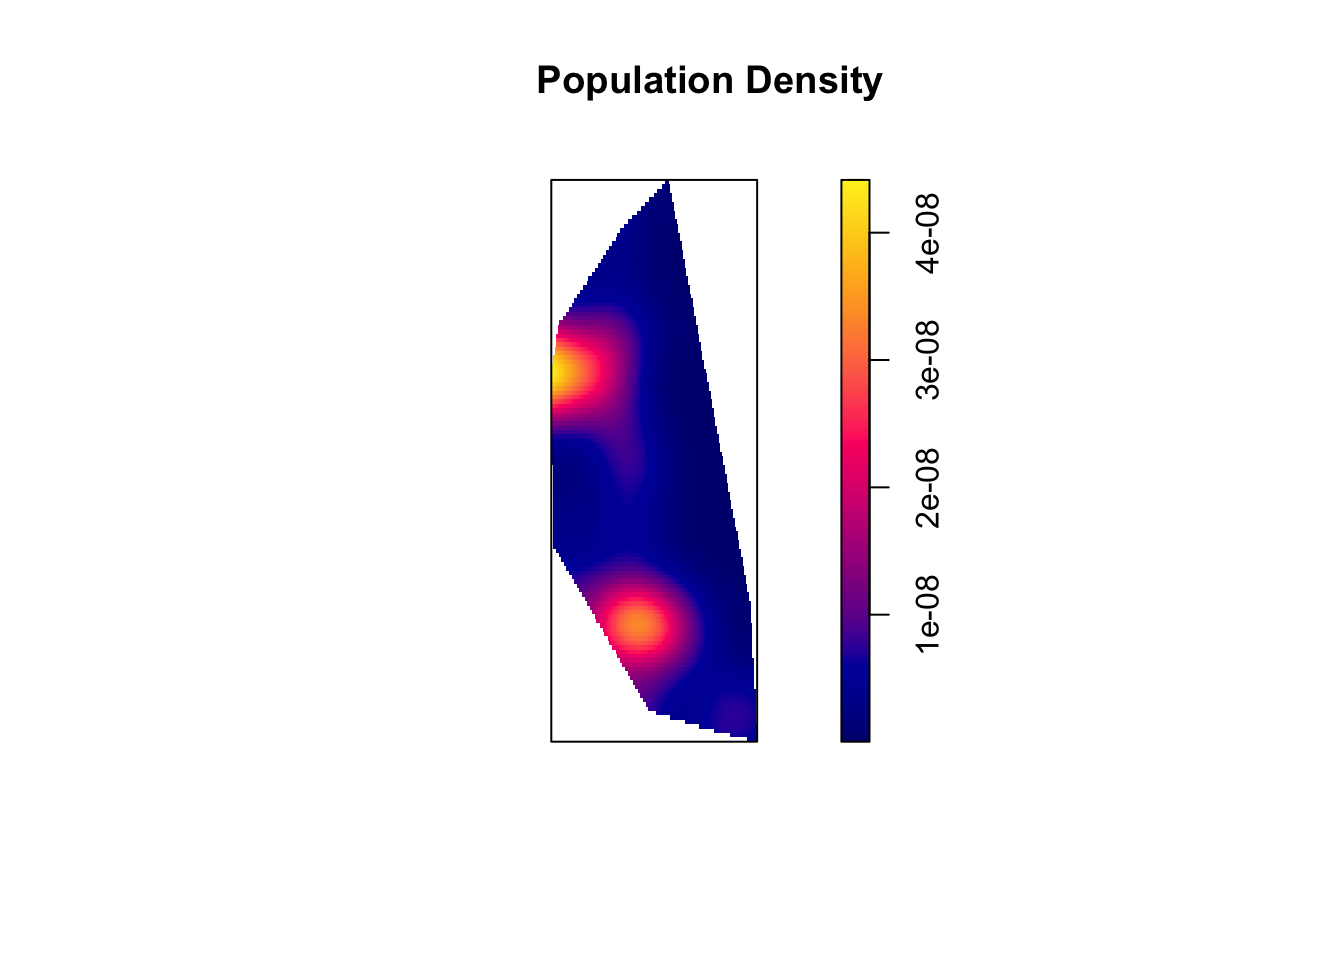

In [ ]:
library(dplyr)
pop_sf <- strike_tract_centroids |> dplyr::select(population_density)
pop_sf <- st_transform(pop_sf, crs=3587)
hull_sf <- st_transform(hull_sf, crs=3587)
point_coords <- st_coordinates(pop_sf)
marks_data <- pop_sf$population_density
pop_ppp <- ppp(x = point_coords[, 1], 
               y = point_coords[, 2], 
               marks = marks_data, 
               window = as.owin(hull_sf))
#pop_ppp <- as.ppp(pop_sf, W=as.owin(hull_sf))
plot(density(pop_ppp, weights=pop_ppp$marks), main="Population Density")

We will divide the population density into three population density areas (high density, medium density, and low density) in order to run hypothesis testing. The density plot below shows that there is higher population density closer to San Francisco and Los Angeles with lower population density closer on the eastern side of California.

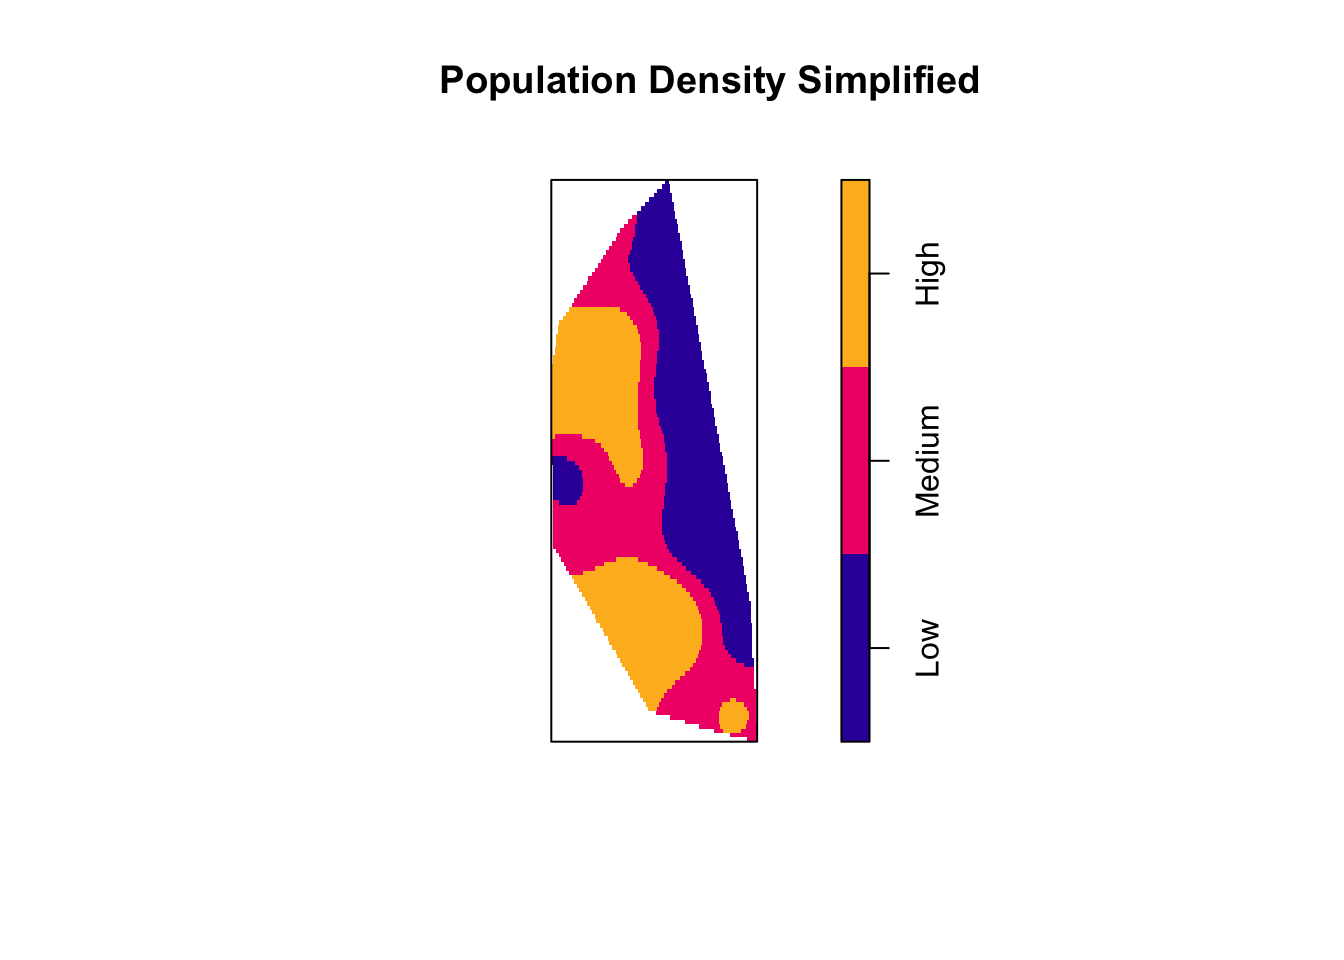

In [ ]:
num_regions <- 3
region_labels <- c("Low", "Medium", "High")
pop_vals <- pop_int
pop_quant <- quantile(pop_vals, probs=(0:num_regions)/num_regions, na.rm=TRUE)
pop_cut <- cut(pop_vals, breaks=pop_quant, labels=region_labels)
pop_areas <- tess(image=pop_cut)
plot(pop_areas, main="Population Density Simplified")

In order to access our hypothesis, we must compute the intensity function for trespasser fatalities. The intensity function is shown below. The density plot highlights the concentration of strikes in Northern California around San Francisco.

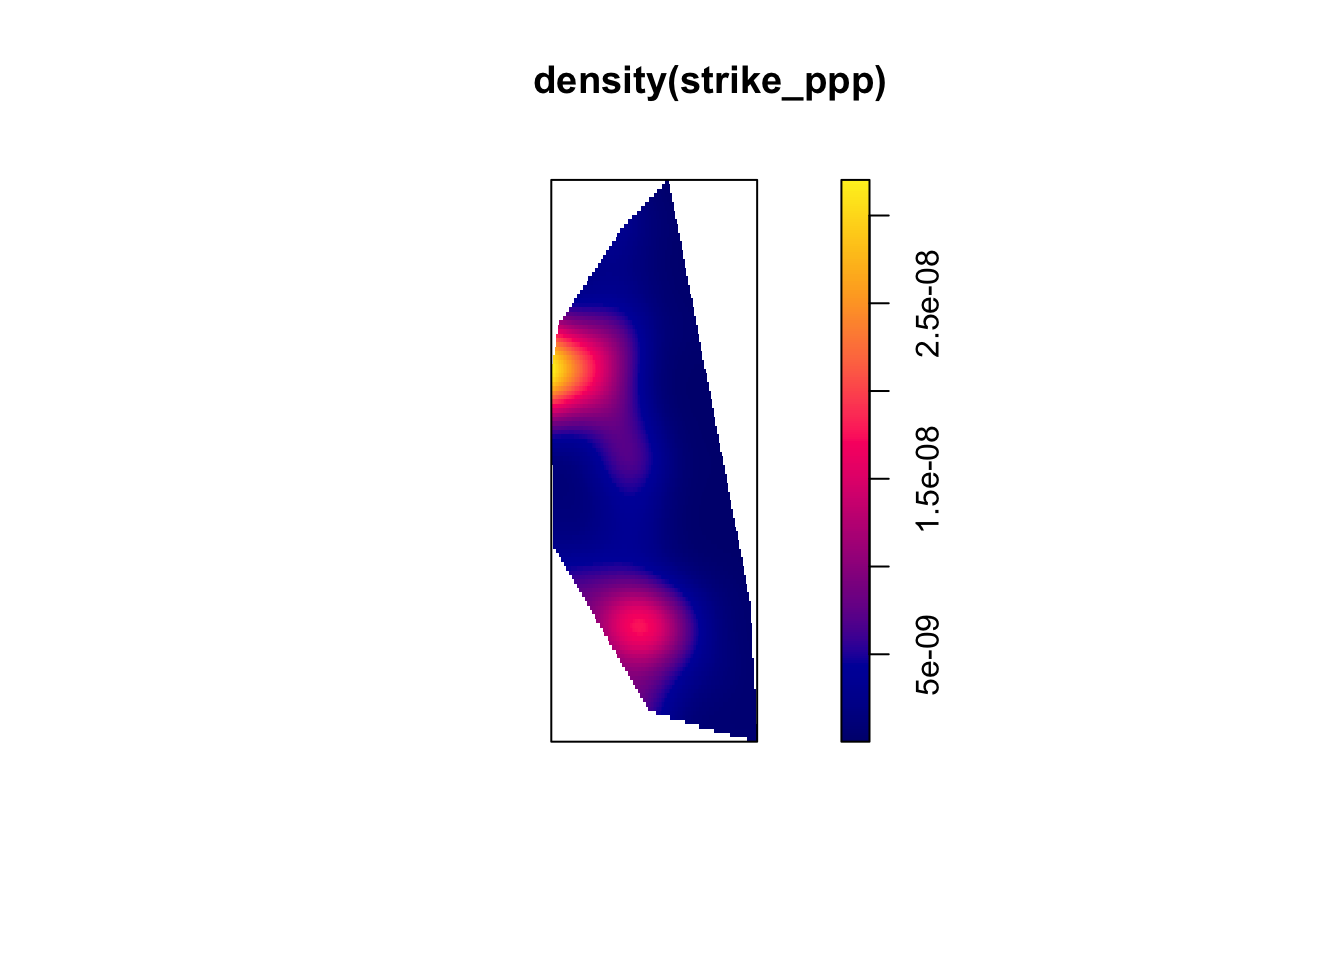

In [ ]:
strike_ppp <- as.ppp(st_as_sfc(trespasser_sf), Window(pop_ppp))

Using the fatality intensity function and the population density areas, we can compute the number of fatalities in high density, medium density, and low density areas. These values are shown below.

In [ ]:
obs_strike_counts <- quadratcount(strike_ppp, tess=pop_areas) |> as.vector()
names(obs_strike_counts) <- region_labels
obs_strike_counts

   Low Medium   High 
    11    189   1321 

After running 999 monte carlo simulations, we can show the distribution of the fatalities in each of the density areas compared to the observed number of fatalities in those areas.

### High Density Areas

There were no simulations with as many fatalities in high density areas as our observed data. This is shown by the output of 0.001 below, where the result is the number of rows that have greater than or equal to the observed value dividing by the rows in the simulated data plus one row of the observed data.

We can conclude that the number of trespasser fatalities in high density areas is significantly greater than what would be expected by population density alone.

`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.

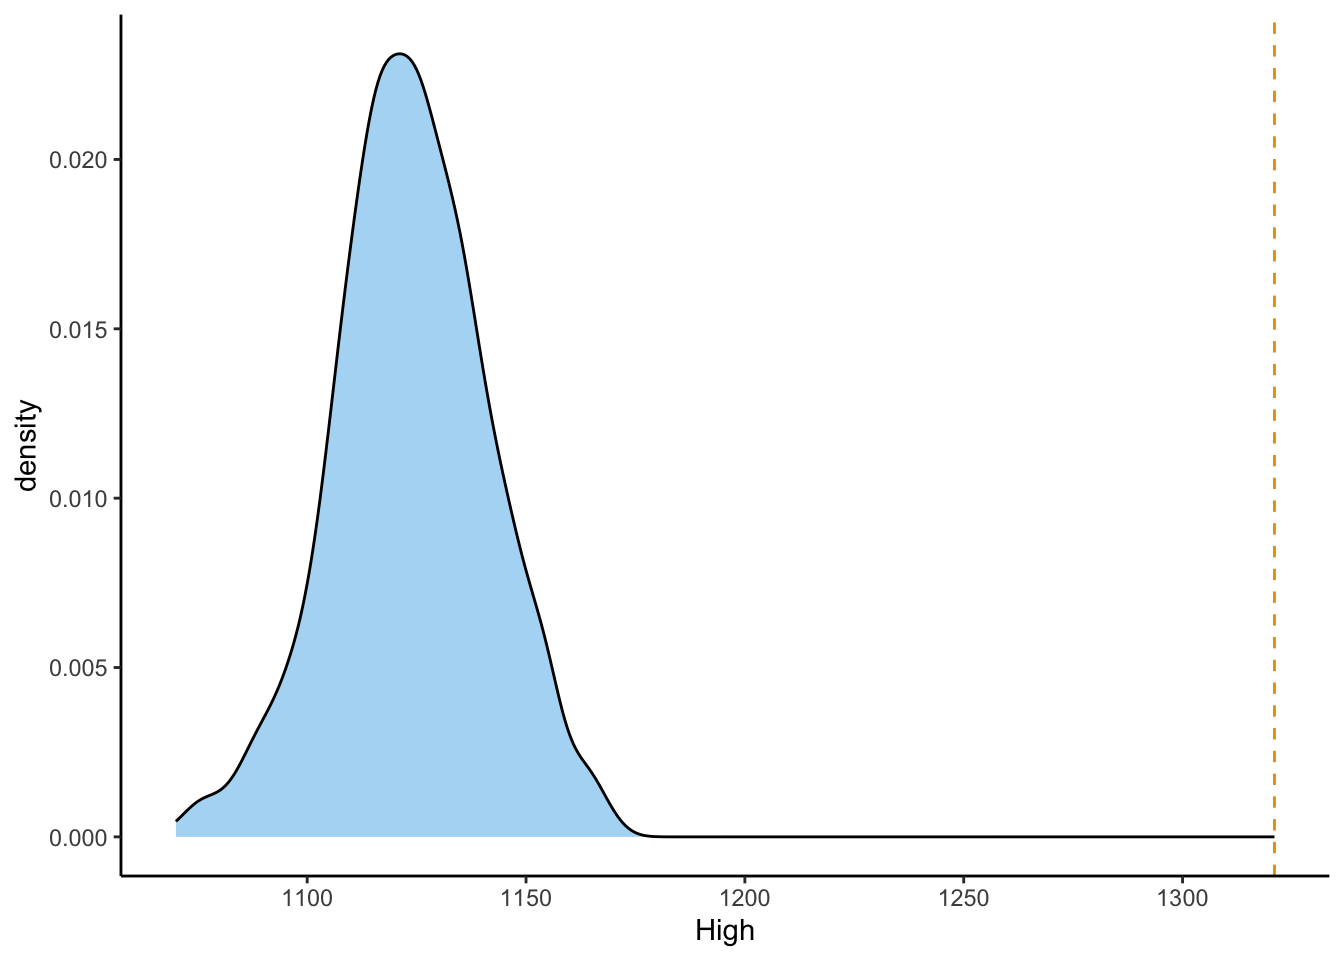

In [ ]:
set.seed(6805)
compute_quadrat_counts <- function(sim_ppp) {
  sim_counts <- quadratcount(sim_ppp, tess=pop_areas) |> as.vector()
  names(sim_counts) <- region_labels
  return(sim_counts)
}
gen_sims_ppp <- function(num_sims) {
  strike_sims <- spatstat.random::rpoint(
    n = 1521,
    f = pop_int,
    nsim = num_sims
  )
  return(strike_sims)
}
full_sims_list <- gen_sims_ppp(num_sims = 999)
full_sim_area_counts <- lapply(X=full_sims_list, FUN=compute_quadrat_counts)
full_count_df <- as_tibble(full_sim_area_counts) |> t() |> as_tibble()

In [ ]:
q4_more_extreme_df <- mc_df[mc_df$High >= obs_strike_counts["High"],]
q4_prop_more_extreme <- nrow(q4_more_extreme_df) / nrow(mc_df)
q4_prop_more_extreme

[1] 0.001

### Medium Density Areas

There were no simulations with as few fatalities in medium density areas as our observed data. This is shown by the output of 0.001 below, where the result is the number of rows that have less than or equal to the observed value dividing by the rows in the simulated data plus one row of the observed data.

We can conclude that the number of trespasser fatalities in medium density areas is significantly less than what would be expected by population density alone.

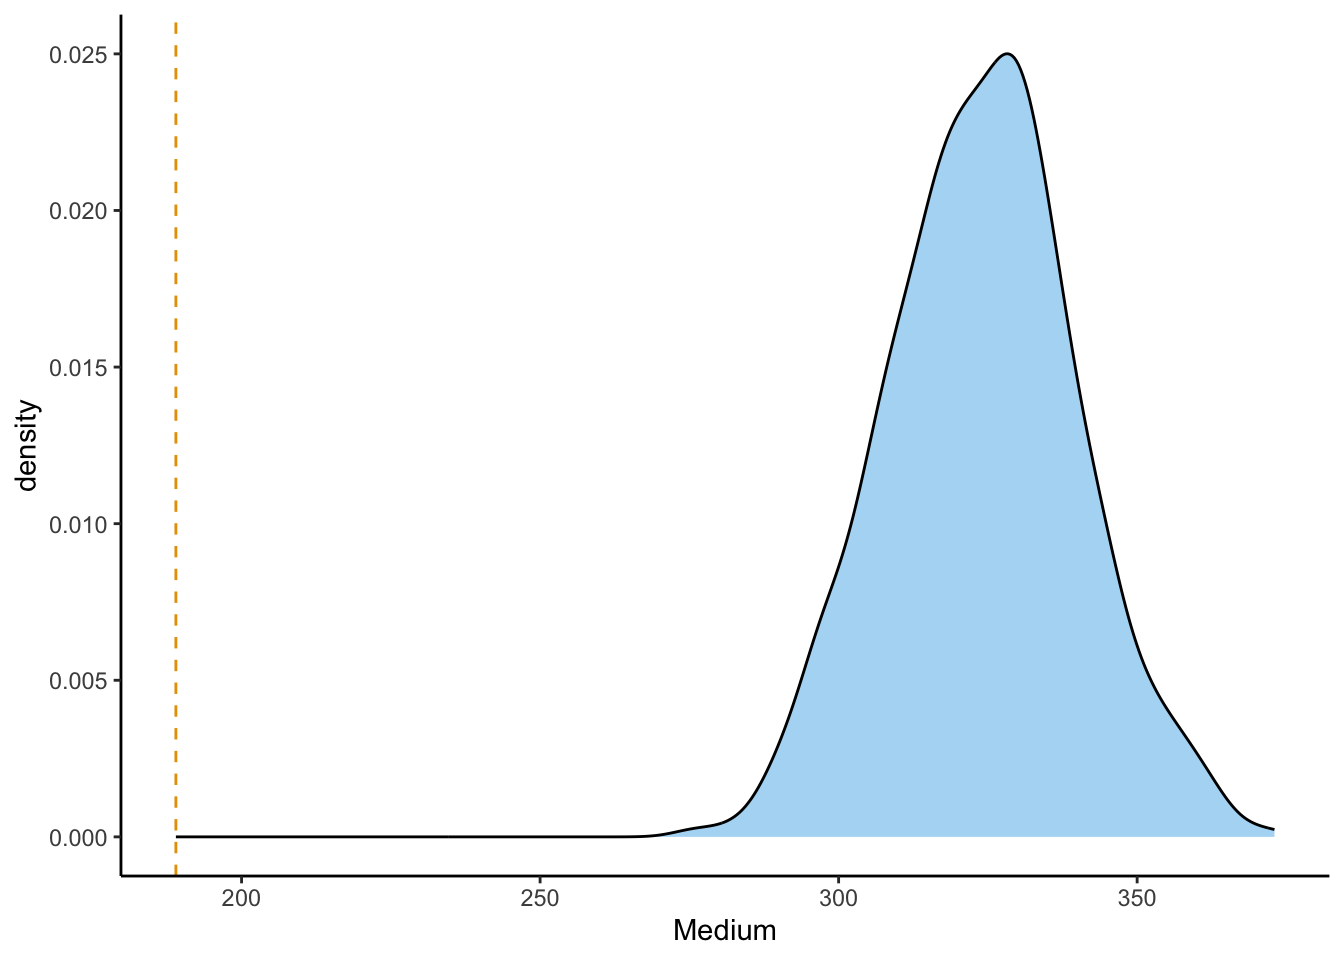

In [ ]:
mc_df <- bind_rows(full_count_df, obs_strike_counts)
full_count_df |> ggplot(aes(x=Medium)) +
  #geom_bar(stat='count') +
  geom_density(fill=cb_palette[2], alpha=0.5) +
  geom_vline(xintercept = obs_strike_counts["Medium"], linetype="dashed", color=cb_palette[1]) +
  theme_classic()

In [ ]:
q4_more_extreme_df <- mc_df[mc_df$Medium <= obs_strike_counts["Medium"],]
q4_prop_more_extreme <- nrow(q4_more_extreme_df) / nrow(mc_df)
q4_prop_more_extreme

[1] 0.001

### Low Density Areas

Similar to medium density areas, there were no simulations with as few fatalities in low density areas as our observed data. This is shown by the output of 0.001 below, where the result is the number of rows that have less than or equal to the observed value dividing by the rows in the simulated data plus one row of the observed data.

We can conclude that the number of trespasser fatalities in low density areas is significantly less than what would be expected by population density alone.

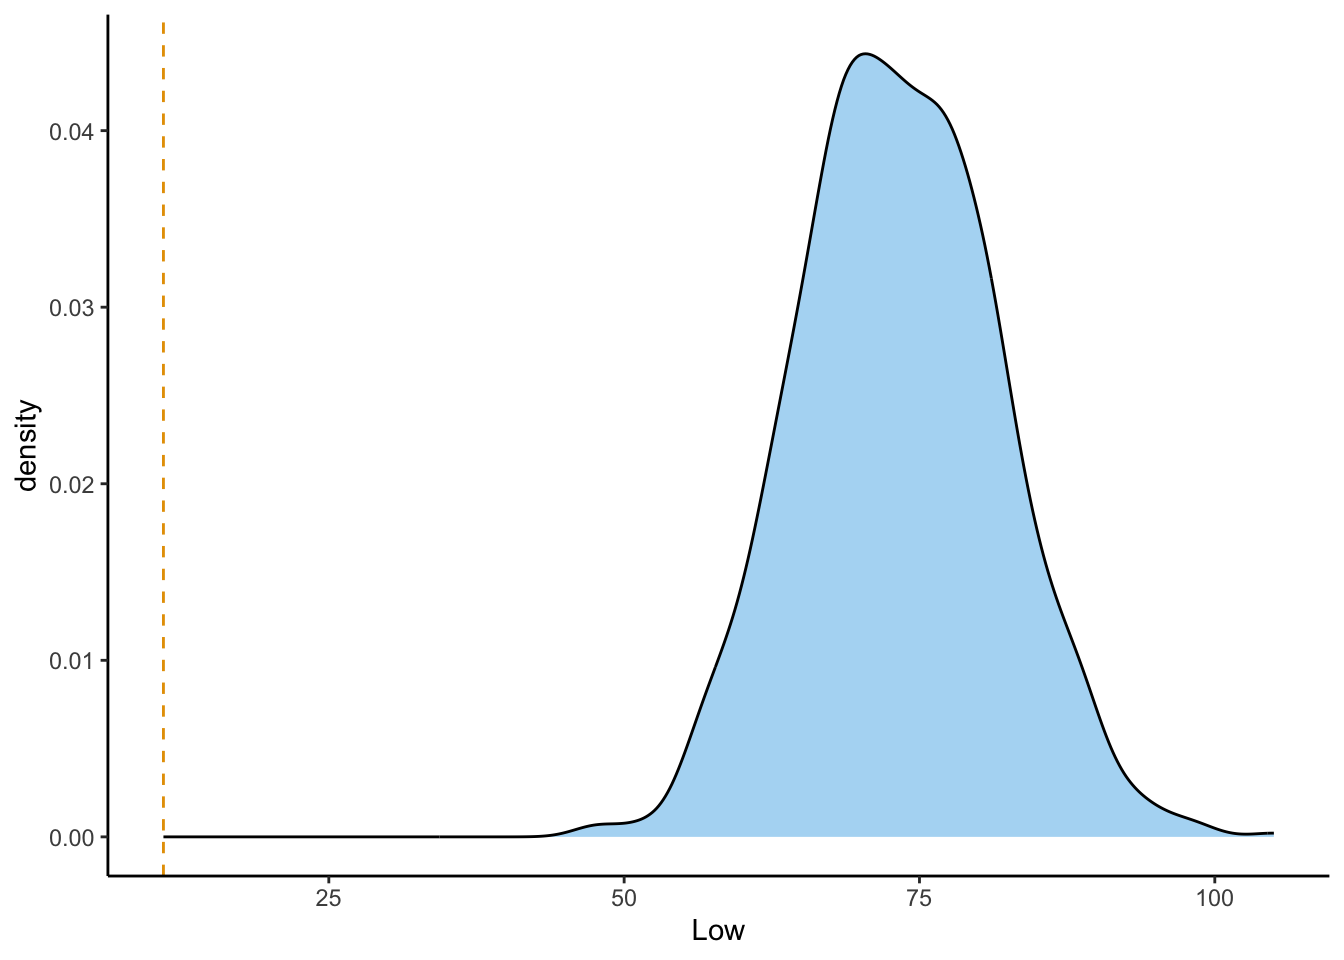

In [ ]:
mc_df <- bind_rows(full_count_df, obs_strike_counts)
full_count_df |> ggplot(aes(x=Low)) +
  #geom_bar(stat='count') +
  geom_density(fill=cb_palette[2], alpha=0.5) +
  geom_vline(xintercept = obs_strike_counts["Low"], linetype="dashed", color=cb_palette[1]) +
  theme_classic()

In [ ]:
q4_more_extreme_df <- mc_df[mc_df$Medium <= obs_strike_counts["Medium"],]
q4_prop_more_extreme <- nrow(q4_more_extreme_df) / nrow(mc_df)
q4_prop_more_extreme

[1] 0.001

We can **reject** the null hypothesis and conclude that the number of trespasser fatalities in census tracts is greater than or less than what would be expected by population density alone. Further, trespasser fatalities are higher than what would be observed by population density and trespasser fatalities in medium and low density areas are lower than what would be expected by population density.

## Discussion

The results of our hypothesis test indicate that the number of trespasser fatalities in census tracts are not soley dependent on the population density alone. By rejecting the null hypothesis, we can conclude that there are other contributing factors to trespasser fatalities in an area in addition to the number of people.

High density areas experience significantly higher rates of fatalities than what would be expected on population density alone. This suggests that other factors in areas in addition to population density could be at play. For example, homelessness tends to exist primarily in urban areas and homeless individuals often make encapments next to the railroad. This could increase the likilihood of being hit by the train.

Medium and low density areas experience a significantly lower amount of strikes than would be expected based on population density alone. This could be due to less frequent train service, fewer homeless people, or less pedestrians near the train tracks.

## Conclusion

Trespasser fatalities in high density areas are significantly higher than what would be expected by population density alone. In contrast, trespasser fatalities in medium and low density areas significantly lower than what would be expected by population density alone. Policy makers and safety officials should focus on improving safety efforts in areas with high population density. Specific cities that should be investigated are Richmond, Berkeley, Davis and Modesto. Further research could investigate other factors that could contribute to trespasser strikes in addition to population density such as homelessness, pedestrian crossings, or crime rates.

Kidda, Starr, Stephanie G Chase, Danielle Hiltunen, et al. 2020. “Fatal Trespasser Strikes in the United States: 2012-2017 \[Research Results\].” United States. Department of Transportation. Federal Railroad Administration.

Savage, Ian. 2007. “Trespassing on the Railroad.” *Research in Transportation Economics* 20: 199–224.